In [11]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [12]:
print(tf.VERSION)
print(tf.keras.__version__)

1.12.0
2.1.6-tf


In [13]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [14]:
x_train.shape

(60000, 28, 28)

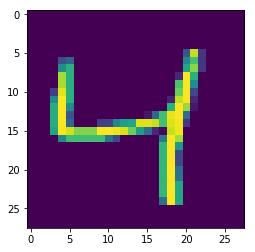

In [5]:
#from matplotlib import pyplot as plt
#%matplotlib inline
#plt.imshow(x_train[2,:,:], interpolation='nearest')
#plt.show()

In [15]:
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)
x_train.shape

(60000, 28, 28, 1)

In [16]:

#from keras.utils import to_categorical
#y_train = to_categorical(y_train)
y_train.shape

(60000,)

In [20]:
from tensorflow.keras import layers
# overview https://www.tensorflow.org/guide/keras#functional_api
# documentation https://www.tensorflow.org/api_docs/python/tf/keras/
inputs = tf.keras.Input(shape=(28,28,1))

x = layers.Conv2D(32, (3,3))(inputs)
x = layers.MaxPooling2D(pool_size = (2,2) , padding='same')(x)
x = layers.Flatten()(x) # is needed
x = layers.Dense(100, activation='relu')(x)
x = layers.Dropout(rate = 0.2)(x)

predictions = layers.Dense(10, activation='softmax')(x)

In [21]:
model = tf.keras.Model(inputs=inputs, outputs=predictions)

# The compile step specifies the training configuration.
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               540900    
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total para

In [22]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# para loss='sparse_categorical_crossentropy', funciona esto
# y_train.shape
# >(60000,)
# pero para para loss='categorical_crossentropy', funciona esto
# y_train = to_categorical(y_train)
# y_train.shape
# >(60000,10)

model.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 20s 337us/step - loss: 0.2214 - acc: 0.9341
Epoch 2/5
60000/60000 [==============================] - 19s 321us/step - loss: 0.0882 - acc: 0.9724
Epoch 3/5
60000/60000 [==============================] - 20s 330us/step - loss: 0.0625 - acc: 0.9798
Epoch 4/5
60000/60000 [==============================] - 18s 302us/step - loss: 0.0491 - acc: 0.9839
Epoch 5/5
60000/60000 [==============================] - 19s 311us/step - loss: 0.0405 - acc: 0.9868


In [10]:
model.evaluate(
    x=x_test,
    y=y_test,
    verbose=1
)

10000/10000 [==============================] - 1s 81us/step


[0.057762957797509444, 0.98419999999999996]